In [ ]:
!pip install --pre deepchem
import deepchem as dc
dc.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'2.6.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualizing the Raw Dataset

In [ ]:
# Delaney Raw Preprocessed Data Set
import pandas as pd
delaney_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Chemistry/predicting_solubility/delaney-processed.csv")
delaney_dataframe[0:10]

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
8,Dieldrin,-4.533,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C


In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
# Visualize the data set
train_df = train_dataset.to_dataframe()
train_df

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.390413,1.0,CC(C)=CCCC(C)=CC(=O)
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.090421,1.0,CCCC=C
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.464346,1.0,CCCCCCCCCCCCCC
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.704920,1.0,CC(C)Cl
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,1.159746,1.0,CCC(C)CO
...,...,...,...,...
897,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.649881,1.0,CC(=O)OCC(=O)C3(O)CCC4C2CCC1=CC(=O)CCC1(C)C2C(...
898,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.388598,1.0,c3ccc2nc1ccccc1cc2c3
899,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.654719,1.0,Nc2cccc3nc1ccccc1cc23
900,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.311180,1.0,C1CCCCCC1


In [ ]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(345,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(345, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(972,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16:

0.10692214965820312

In [ ]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print(model.evaluate(train_dataset, [metric], transformers))
print(model.evaluate(test_dataset, [metric], transformers))

{'pearson_r2_score': 0.9153383982377037}
{'pearson_r2_score': 0.7116292418087952}


In [ ]:
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
          'CCOC(=O)CC',
          'CSc1nc(NC(C)C)nc(NC(C)C)n1',
          'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
          'Cc1cc2ccccc2cc1C']

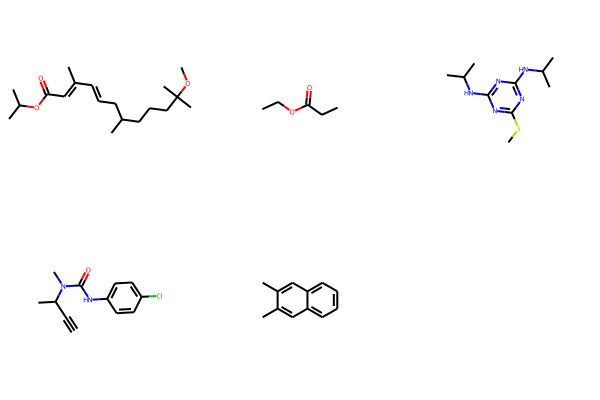

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles]
MolsToGridImage(mol_list)

In [ ]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

In [ ]:
predicted_solubility = model.predict_on_batch(x)

In [ ]:
predicted_solubility

array([[-0.9231769 ],
       [ 1.7490088 ],
       [-0.22267696],
       [-0.32059884],
       [-0.4270329 ]], dtype=float32)

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

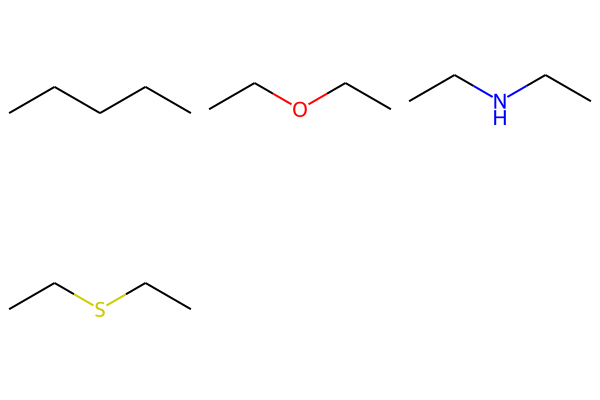

In [ ]:
MolsToGridImage(mol_list)

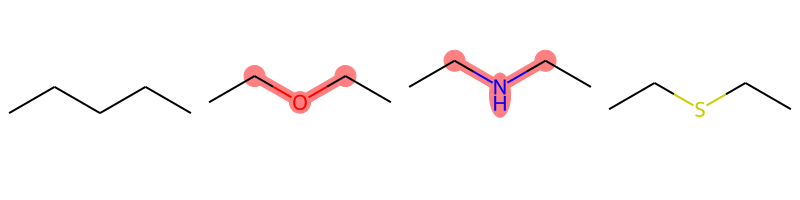

In [ ]:
query = Chem.MolFromSmarts("C[N,O]C")
match_list = [mol.GetSubstructMatch(query) for mol in
mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,
highlightAtomLists=match_list)